# Clash Tests Analysis
## By Mustafa A. Saleh

## Introduction
##### Our dataset consists of all the clash tests, exported from Navisworks, to perform clash detection and eliminate contradictions between disciplines in the project.

 




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('clashes.csv')

In [3]:
df.head()

,id,name3,total,Round 1,Round 2,Round 3,Round 4
0,1,001 - AR Walls - AR Walls,42,41,33,36,34
1,2,002 - AR Walls - AR Windows-Doors,14,8,8,8,8
2,3,003 - AR Walls - AR Floors,107,68,66,70,67
3,4,004 - AR Walls - AR Roofs,0,0,0,0,0
4,5,005 - AR Walls - AR Stairs,0,0,0,0,0


In [4]:
df.dtypes

id          int64
name3      object
total       int64
Round 1     int64
Round 2     int64
Round 3     int64
Round 4     int64
dtype: object

In [5]:
df.isna().sum()

id         0
name3      0
total      0
Round 1    0
Round 2    0
Round 3    0
Round 4    0
dtype: int64

In [6]:
df.describe()

,id,total,Round 1,Round 2,Round 3,Round 4
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,95.500000,12.773684,10.973684,8.189474,6.821053,6.510526
std,54.992424,92.930402,90.854756,57.051966,54.084292,53.722266
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,142.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190.000000,1161.000000,1201.000000,699.000000,706.000000,706.000000


In [7]:
# setting id column as index 
df.set_index('id', inplace = True)

In [8]:
# Function to rename columns
def rename_columns(df):
    # Create a list of the new column names
    new_columns = ['test', 'total_clashes'] + [f'round_{i}' for i in range(1, len(df.columns)-1)]
    
    # Rename the columns
    df.rename(columns=dict(zip(df.columns, new_columns)), inplace=True)
    
    return df

In [9]:
# rename columns to be easily manipulated
rename_columns(df)
df.head()

,test,total_clashes,round_1,round_2,round_3,round_4
id,,,,,,
1,001 - AR Walls - AR Walls,42,41,33,36,34
2,002 - AR Walls - AR Windows-Doors,14,8,8,8,8
3,003 - AR Walls - AR Floors,107,68,66,70,67
4,004 - AR Walls - AR Roofs,0,0,0,0,0
5,005 - AR Walls - AR Stairs,0,0,0,0,0


In [10]:
# eliminate all zero values
df = df[df['total_clashes'] != 0]
df.describe()

,total_clashes,round_1,round_2,round_3,round_4
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,53.933333,46.333333,34.577778,28.800000,27.488889
std,186.615843,183.797814,114.228736,109.166387,108.661196
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000
50%,7.000000,4.000000,4.000000,4.000000,3.000000
75%,16.000000,13.000000,12.000000,10.000000,8.000000
max,1161.000000,1201.000000,699.000000,706.000000,706.000000


In [11]:
# create new columns by splitting the 'test' column
df[['discipline_1', 'discipline_2']] = df['test'].str.split('-', n=2, expand=True).iloc[:, 1:3]

# move new columns to the front of the DataFrame
df.insert(0, 'discipline_2', df.pop('discipline_2'))
df.insert(0, 'discipline_1', df.pop('discipline_1'))


In [12]:
df.head()

,discipline_1,discipline_2,test,total_clashes,round_1,round_2,round_3,round_4
id,,,,,,,,
1,AR Walls,AR Walls,001 - AR Walls - AR Walls,42,41,33,36,34
2,AR Walls,AR Windows-Doors,002 - AR Walls - AR Windows-Doors,14,8,8,8,8
3,AR Walls,AR Floors,003 - AR Walls - AR Floors,107,68,66,70,67
6,AR Walls,AR Railings,006 - AR Walls - AR Railings,6,0,0,0,0
7,AR Walls,STR Columns,007 - AR Walls - STR Columns,22,22,4,4,3


In [13]:
df.describe()

,total_clashes,round_1,round_2,round_3,round_4
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,53.933333,46.333333,34.577778,28.800000,27.488889
std,186.615843,183.797814,114.228736,109.166387,108.661196
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000
50%,7.000000,4.000000,4.000000,4.000000,3.000000
75%,16.000000,13.000000,12.000000,10.000000,8.000000
max,1161.000000,1201.000000,699.000000,706.000000,706.000000


## Getting the discipline with the most issues in the dataset
### Total Clashes by Discipline

In [14]:
# Function to get total clashes
def get_total_clashes(df,discipline1, discipline2):
    total_clashes = df.loc[(df['discipline_1'].str.contains(discipline1) | df['discipline_2'].str.contains(discipline1)) & 
                           (df['discipline_1'].str.contains(discipline2) | df['discipline_2'].str.contains(discipline2))]['total_clashes'].sum()
    return total_clashes

In [15]:
ar_all =  get_total_clashes(df,'AR ', 'AR ')
str_all = get_total_clashes(df,'STR ', 'STR ')
me_all = get_total_clashes(df,'ME ', 'ME ')
el_all = get_total_clashes(df,'EL ', 'EL ')


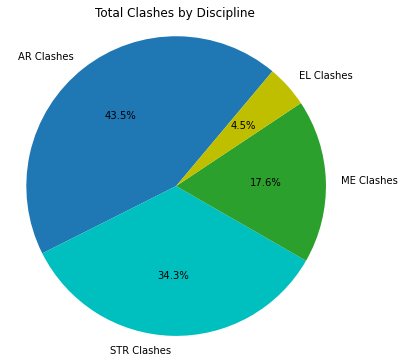

In [16]:
# Define the data for the pie chart
labels = ['AR Clashes', 'STR Clashes', 'ME Clashes', 'EL Clashes']
sizes = [ar_all, str_all, me_all, el_all]
colors=['tab:blue', 'c', 'tab:green', 'y']

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))  # Set the figure size to 8x8 inches
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=50, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
ax.set_title('Total Clashes by Discipline')


plt.show()


## Clash Detection Progress
#### Total Clashes Over the Four Rounds (Phase 1)

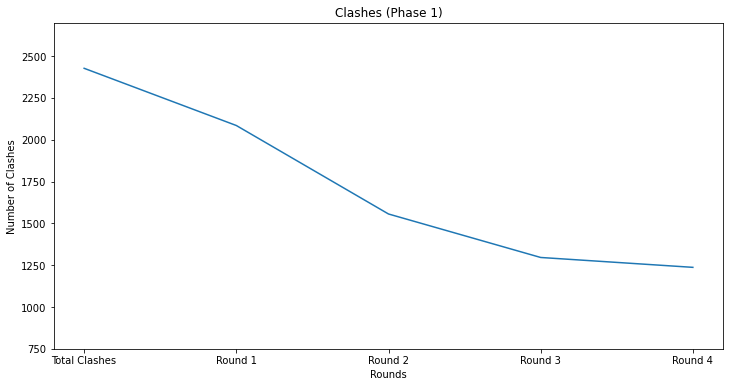

In [17]:
# Select numeric columns and compute the sum
sums = df.select_dtypes(include='number').sum()

# Create the line plot
sums = df.select_dtypes(include='number').sum()

# Create the line plot
plt.figure(figsize=[12, 6])
x_labels = sums.index.str.replace('_', ' ').str.title()
sb.lineplot(data=sums)

plt.ylim(750,2700)
plt.xticks(range(len(sums)), x_labels)
plt.xlabel('Rounds');
plt.ylabel('Number of Clashes');
plt.title('Clashes (Phase 1)');
plt.show()

## Clashes Between Same Discipline (Combined)

In [18]:
def count_clashes(df, discipline):
    clashes = df.groupby(df['discipline_1'].str.contains(discipline) & 
                         df['discipline_2'].str.contains(discipline)).sum().values[1]
    return clashes

In [19]:
ar_ar = count_clashes(df,'AR ')
str_str = count_clashes(df,'STR ')
me_me = count_clashes(df,'ME ')
el_el = count_clashes(df,'EL ')

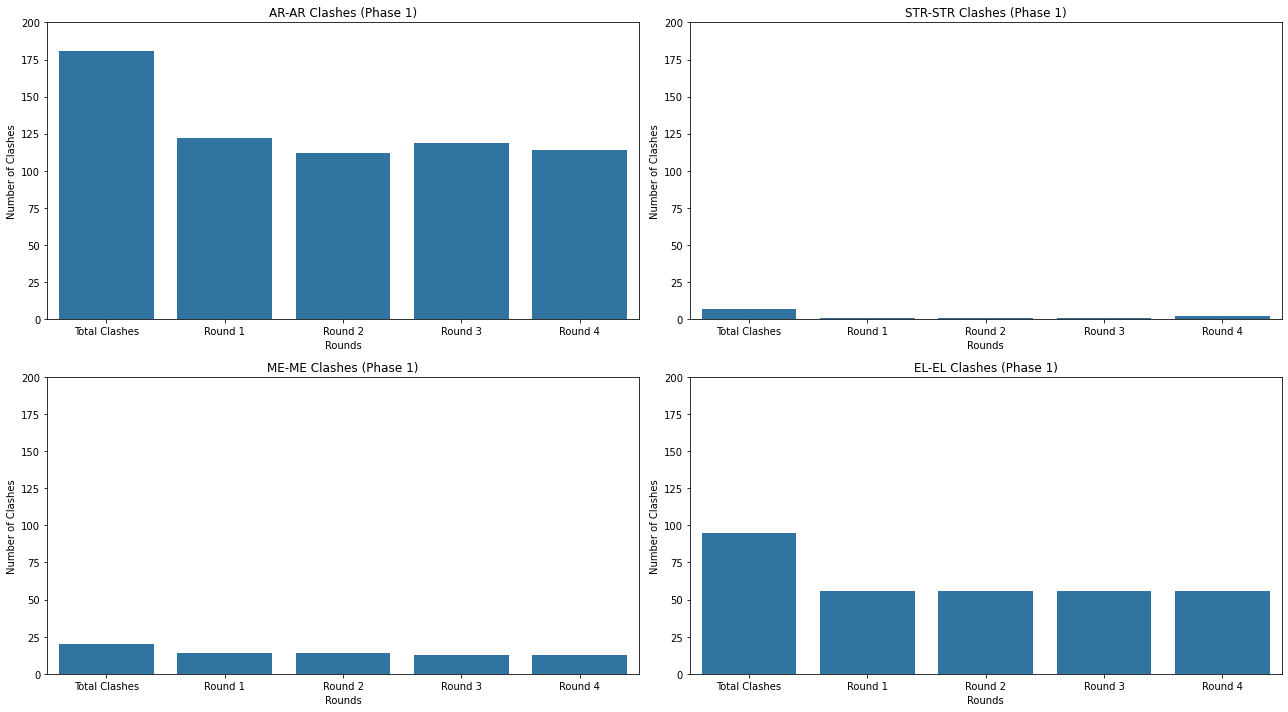

In [20]:
# List of disciplines
disciplines = ['AR ', 'STR ', 'ME ', 'EL ']

# Create figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[18, 10])

# Loop through disciplines and create barplot for each one
for i, discipline in enumerate(disciplines):
    row = i // 2
    col = i % 2
    
    # Group by discipline and create barplot
    clashes = df.groupby(df['discipline_1'].str.contains(discipline) & df['discipline_2'].str.contains(discipline)).sum().values[1]
    sb.barplot(x=x_labels, y=clashes, color=sb.color_palette()[0], ax=axes[row, col])
    
    # Set axis labels and title
    axes[row, col].set_ylim(0, 200)
    axes[row, col].set_xlabel('Rounds')
    axes[row, col].set_ylabel('Number of Clashes')
    axes[row, col].set_title(f'{discipline.strip()}-{discipline.strip()} Clashes (Phase 1)')
    
# Adjust layout and spacing
fig.tight_layout()


## AR-AR Clash Tests

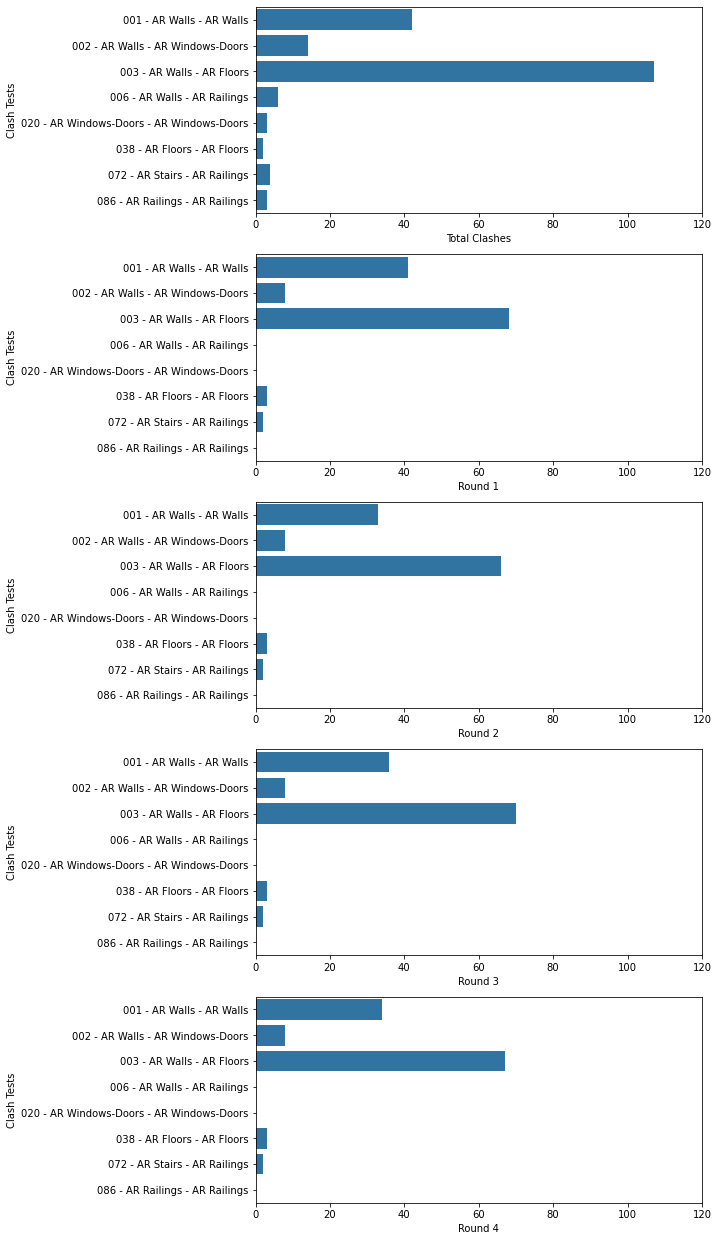

In [21]:
# AR-AR clash tests 
df1 = df
ar_clashes = df1.loc[df1['discipline_1'].str.contains('AR ') & df1['discipline_2'].str.contains('AR ')]

#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8, 22])
fig.figsize=[6,3]

# AR-AR (Total Clashes)
s= sb.barplot(x=ar_clashes["total_clashes"], y=ar_clashes["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,120);

# AR-AR (Round 1)
s= sb.barplot(x=ar_clashes["round_1"], y=ar_clashes["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,120);


# AR-AR (Round 2)
s= sb.barplot(x=ar_clashes["round_2"], y=ar_clashes["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2');
axes[2].set_xlim(0,120);

# AR-AR (Round 3)
s= sb.barplot(x=ar_clashes["round_3"], y=ar_clashes["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,120);


# AR-AR (Round 4)
s= sb.barplot(x=ar_clashes["round_4"], y=ar_clashes["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,120);


## STR-STR Clash Tests

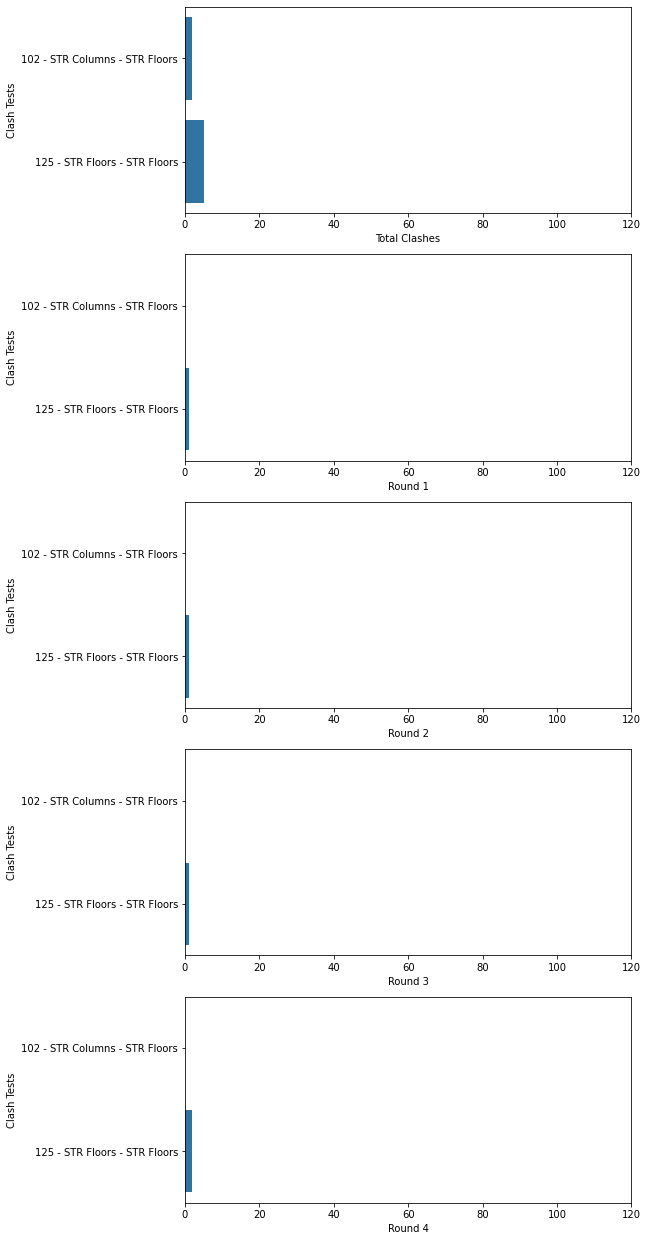

In [22]:
# STR-STR clash tests
str_clashes = df1.loc[df1['discipline_1'].str.contains('STR ') & df1['discipline_2'].str.contains('STR ')]

#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8, 22])
fig.figsize=[6,3]

# STR-STR (Total Clashes)
s= sb.barplot(x= str_clashes["total_clashes"], y= str_clashes["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,120);

# STR-STR (Round 1)
s= sb.barplot(x= str_clashes["round_1"], y= str_clashes["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,120);

# STR-STR (Round 2)
s= sb.barplot(x= str_clashes["round_2"], y= str_clashes["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2');
axes[2].set_xlim(0,120);

# STR-STR (Round 3)
s= sb.barplot(x= str_clashes["round_3"], y= str_clashes["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,120);

# STR-STR (Round 4)
s= sb.barplot(x= str_clashes["round_4"], y= str_clashes["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,120);

## ME-ME Clash Tests

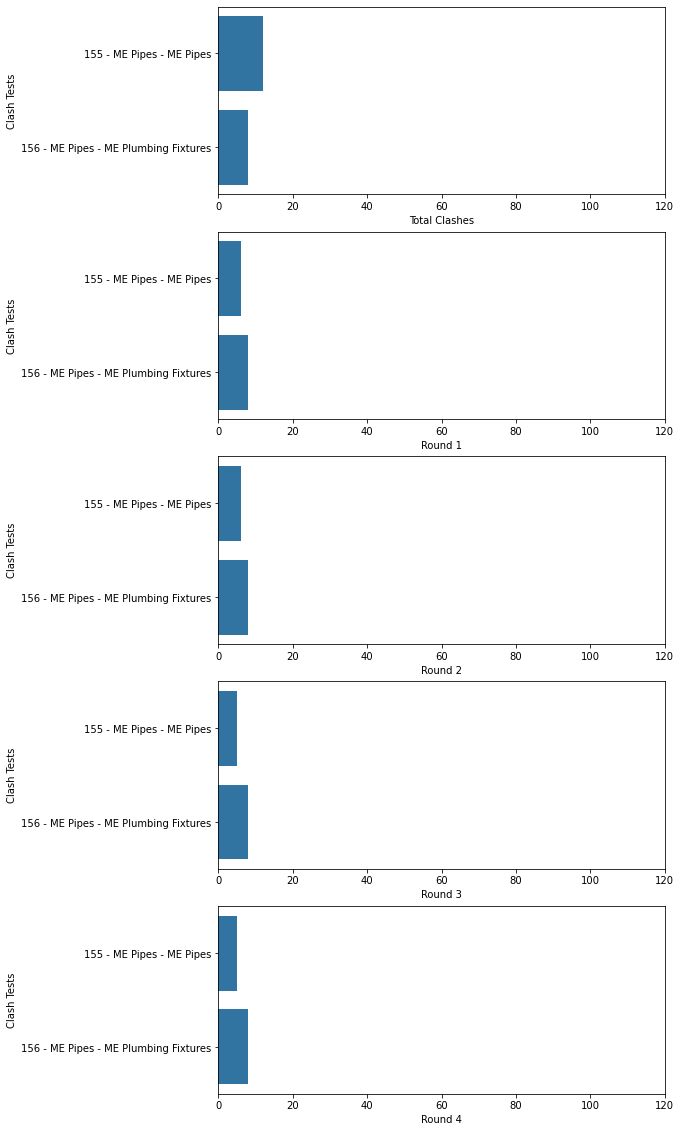

In [23]:
# ME-ME clash tests
me_clashes = df1.loc[df1['discipline_1'].str.contains('ME ') & df1['discipline_2'].str.contains('ME ')]

#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8, 20])
fig.figsize=[6,3]

# ME-ME (Total Clashes)
s= sb.barplot(x= me_clashes["total_clashes"], y= me_clashes["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,120);

# ME-ME (Round 1)
s= sb.barplot(x= me_clashes["round_1"], y= me_clashes["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,120);

# ME-ME (Round 2)
s= sb.barplot(x= me_clashes["round_2"], y= me_clashes["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2');
axes[2].set_xlim(0,120);

# ME-ME (Round 3)
s= sb.barplot(x= me_clashes["round_3"], y= me_clashes["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,120);

# ME-ME (Round 4)
s= sb.barplot(x= me_clashes["round_4"], y= me_clashes["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,120);

## EL-El Clash Tests

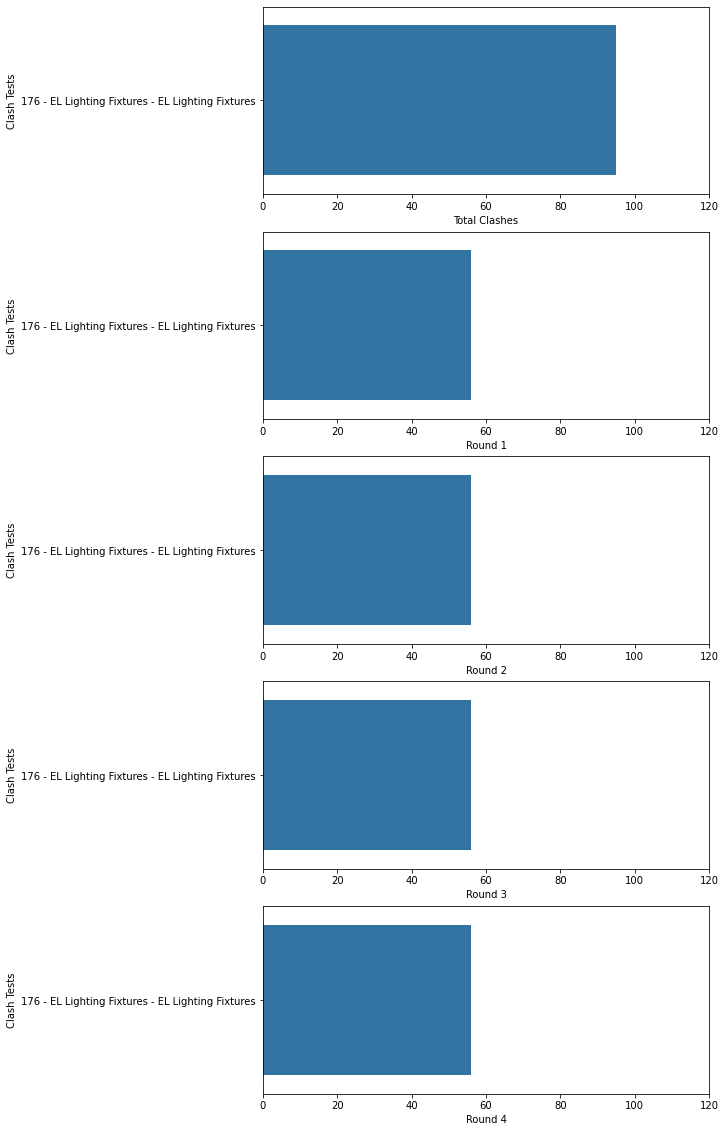

In [24]:
# EL-El Clash tests
el_clashes = df1.loc[df1['discipline_1'].str.contains('EL ') & df1['discipline_2'].str.contains('EL ')]

#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8, 20])
fig.figsize=[6,3]

# EL-EL (Total Clashes)
s= sb.barplot(x= el_clashes["total_clashes"], y= el_clashes["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,120);

# EL-EL (Round 1)
s= sb.barplot(x= el_clashes["round_1"], y= el_clashes["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,120);

# EL-EL (Round 2)
s= sb.barplot(x= el_clashes["round_2"], y= el_clashes["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2');
axes[2].set_xlim(0,120);

# EL-EL (Round 3)
s= sb.barplot(x= el_clashes["round_3"], y= el_clashes["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,120);

# EL-EL (Round 4)
s= sb.barplot(x= el_clashes["round_4"], y= el_clashes["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,120);

## Clashes between different disciplines
### AR (with all disciplines)

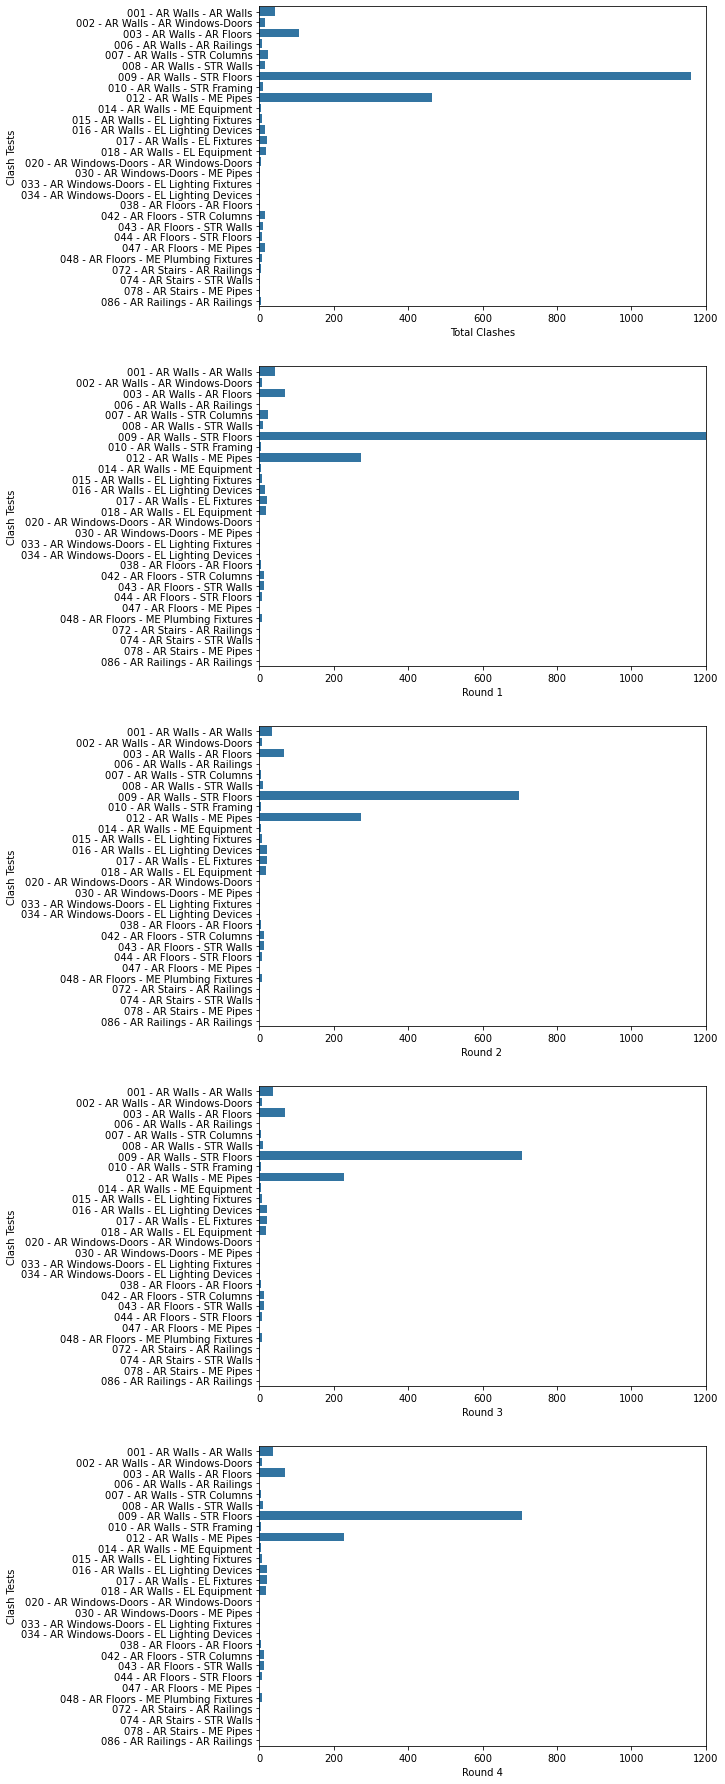

In [25]:
# AR (with all disciplines) 
ar_all = df1.loc[df1['discipline_1'].str.contains('AR ') | df1['discipline_2'].str.contains('AR ')]


#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8,32])
fig.figsize=[6,3]

# AR (Total Clashes)
s= sb.barplot(x= ar_all["total_clashes"] , y=ar_all["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,1200);

# AR (Round_1)
s= sb.barplot(x= ar_all["round_1"] , y=ar_all["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,1200);

# AR (Round_2)
s= sb.barplot(x= ar_all["round_2"] , y=ar_all["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2 ');
axes[2].set_xlim(0,1200);

# AR (Round_3)
s= sb.barplot(x= ar_all["round_3"] , y=ar_all["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,1200);

# AR (Round_4)
s= sb.barplot(x= ar_all["round_3"] , y=ar_all["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,1200);

## STR (with all disciplines)

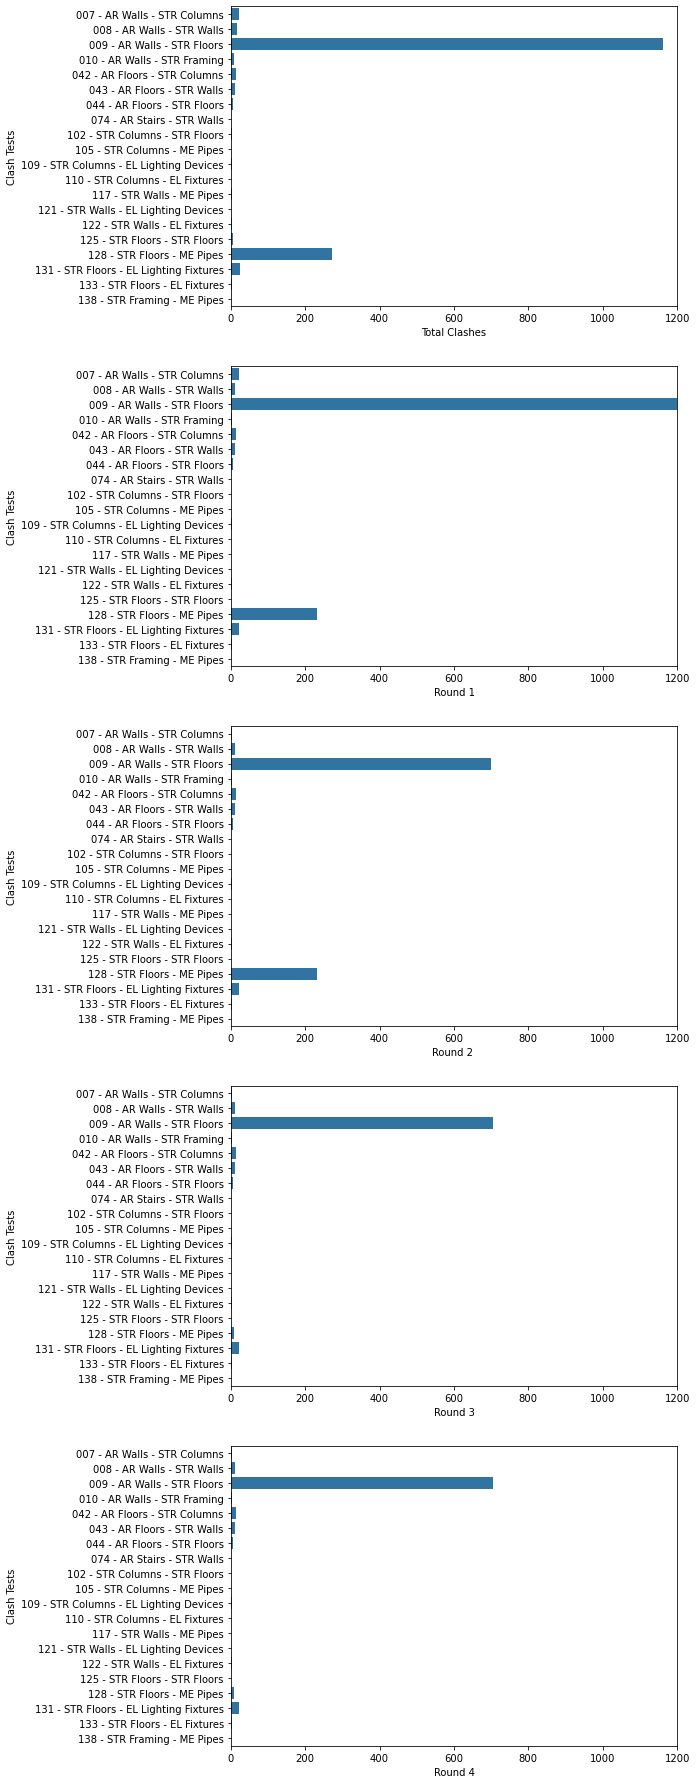

In [26]:
# STR (with all disciplines) 
str_all = df1.loc[df1['discipline_1'].str.contains('STR ') | df1['discipline_2'].str.contains('STR ')]


#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8,32])
fig.figsize=[6,3]

# STR (Total Clashes)
s= sb.barplot(x= str_all["total_clashes"] , y= str_all["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,1200);


# STR (Round 1)
s= sb.barplot(x= str_all["round_1"] , y= str_all["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,1200);

# STR (Round 2)
s= sb.barplot(x= str_all["round_2"] , y= str_all["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2 ');
axes[2].set_xlim(0,1200);

# STR (Round 3)
s= sb.barplot(x= str_all["round_3"] , y= str_all["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,1200);

# STR (Round 4)
s= sb.barplot(x= str_all["round_3"] , y= str_all["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,1200);

## ME (with all disciplines)

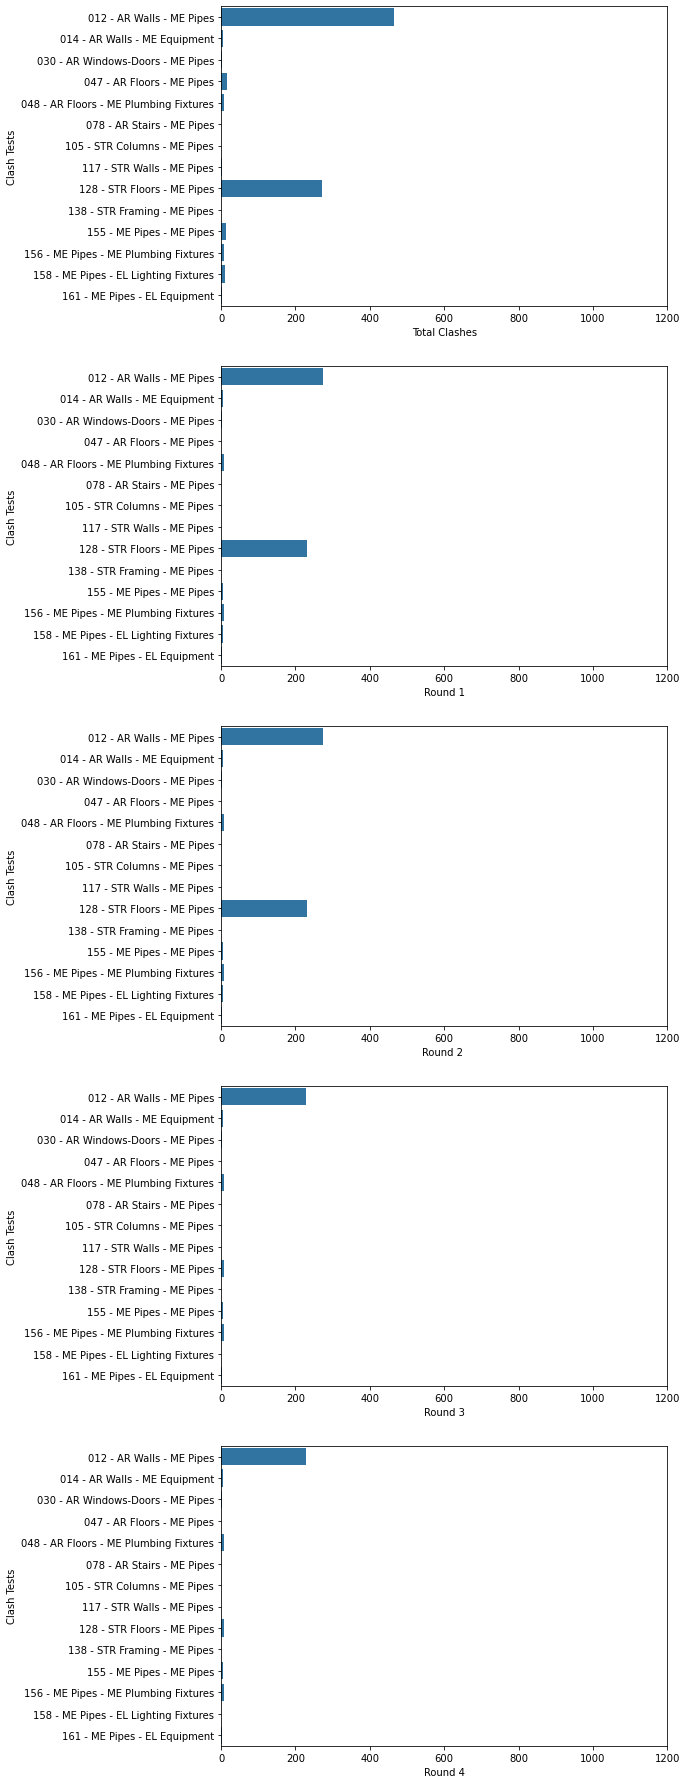

In [27]:
# ME (with all disciplines) 
me_all = df1.loc[df1['discipline_1'].str.contains('ME ') | df1['discipline_2'].str.contains('ME ')]


#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8,32])
fig.figsize=[6,3]

# ME (Total Clashes)
s= sb.barplot(x= me_all["total_clashes"] , y= me_all["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,1200);


# ME (Round 1)
s= sb.barplot(x= me_all["round_1"] , y= me_all["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,1200);

# ME (Round 2)
s= sb.barplot(x= me_all["round_2"] , y= me_all["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2 ');
axes[2].set_xlim(0,1200);

# ME (Round 3)
s= sb.barplot(x= me_all["round_3"] , y= me_all["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,1200);

# ME (Round 4)
s= sb.barplot(x= me_all["round_3"] , y= me_all["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,1200);

## EL (with all disciplines)

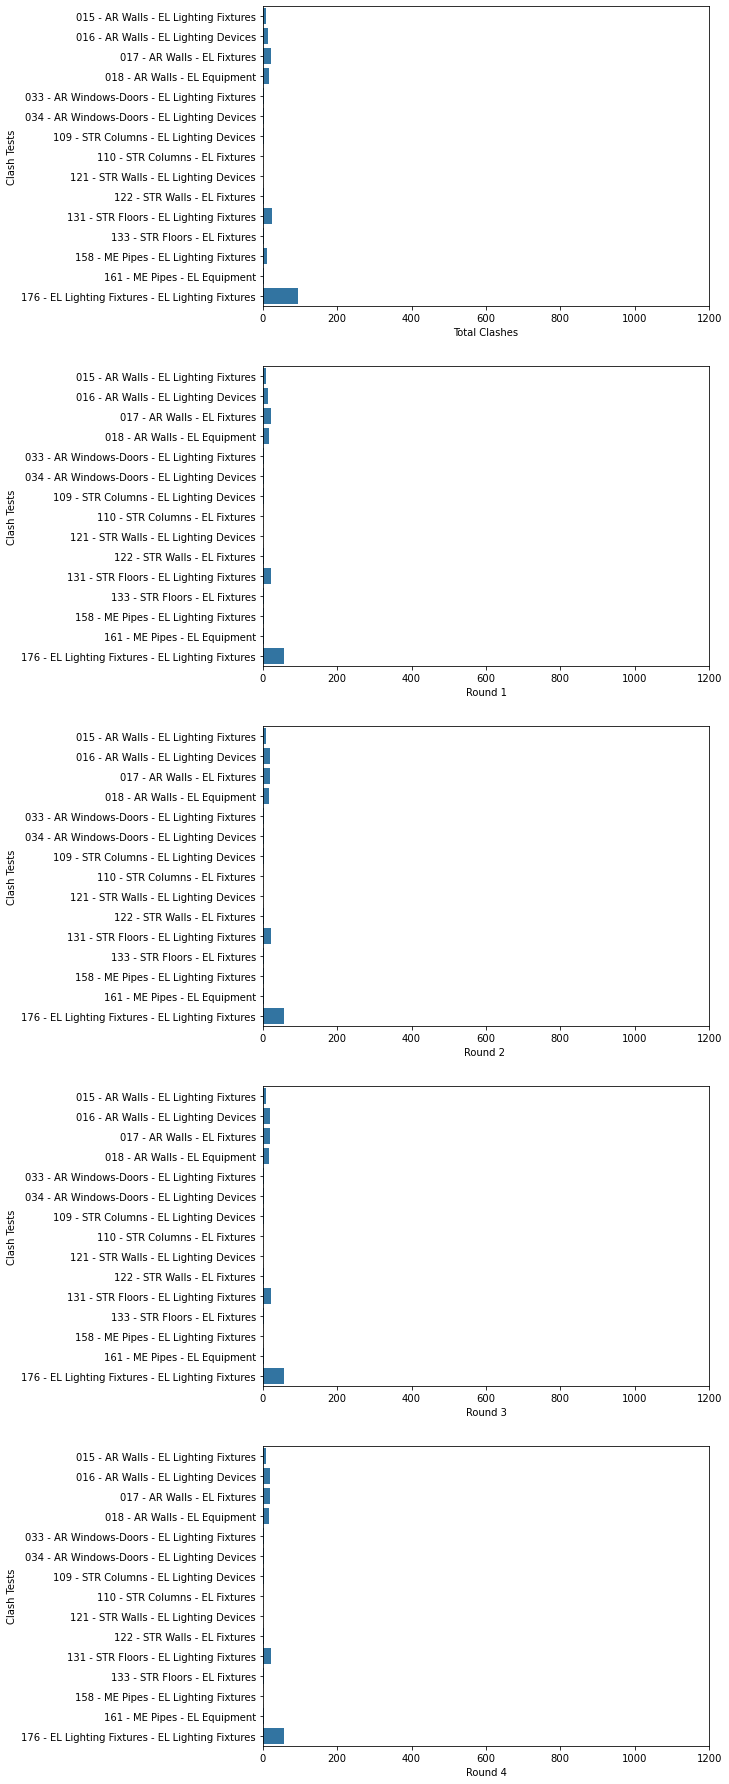

In [28]:
# EL (with all disciplines) 
el_all = df1.loc[df1['discipline_1'].str.contains('EL ') | df1['discipline_2'].str.contains('EL ')]


#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8,32])
fig.figsize=[6,3]

# EL (Total Clashes)
s= sb.barplot(x= el_all["total_clashes"] , y= el_all["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,1200);


# EL (Round 1)
s= sb.barplot(x= el_all["round_1"] , y= el_all["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,1200);

# EL (Round 2)
s= sb.barplot(x= el_all["round_2"] , y= el_all["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2 ');
axes[2].set_xlim(0,1200);

# EL (Round 3)
s= sb.barplot(x= el_all["round_3"] , y= el_all["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,1200);

# EL (Round 4)
s= sb.barplot(x= el_all["round_3"] , y= el_all["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,1200);

## AR Walls (All Clashes)
From previous investigation, we can see that AR walls participated in most of the clashes. Now we put a little focus on it

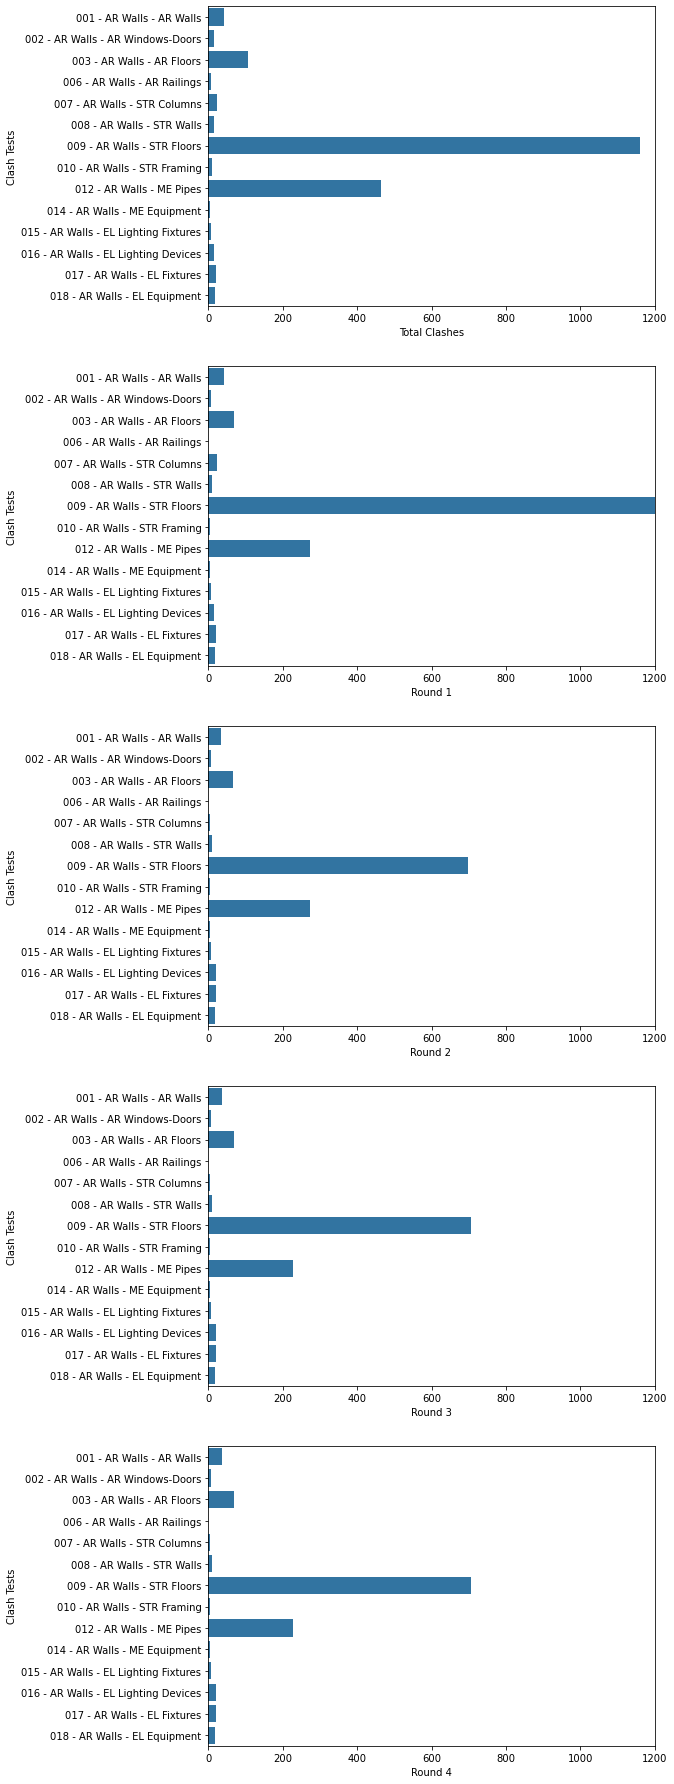

In [29]:
# AR Walls (All Clashes) 
ar_wall = df1.loc[df1['discipline_1'].str.contains('AR Wall') | df1['discipline_2'].str.contains('AR Wall')]


#Plots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize = [8,32])
fig.figsize=[6,3]

# AR (Total Clashes)
s= sb.barplot(x= ar_wall["total_clashes"] , y=ar_wall["test"], color = sb.color_palette()[0], ax = axes[0])

axes[0].set_ylabel('Clash Tests');
axes[0].set_xlabel('Total Clashes');
axes[0].set_xlim(0,1200);

# AR (Round_1)
s= sb.barplot(x= ar_wall["round_1"] , y=ar_wall["test"], color = sb.color_palette()[0], ax = axes[1])

axes[1].set_ylabel('Clash Tests');
axes[1].set_xlabel('Round 1');
axes[1].set_xlim(0,1200);

# AR (Round_2)
s= sb.barplot(x= ar_wall["round_2"] , y=ar_wall["test"], color = sb.color_palette()[0], ax = axes[2])

axes[2].set_ylabel('Clash Tests');
axes[2].set_xlabel('Round 2 ');
axes[2].set_xlim(0,1200);

# AR (Round_3)
s= sb.barplot(x= ar_wall["round_3"] , y=ar_wall["test"], color = sb.color_palette()[0], ax = axes[3])

axes[3].set_ylabel('Clash Tests');
axes[3].set_xlabel('Round 3');
axes[3].set_xlim(0,1200);

# AR (Round_4)
s= sb.barplot(x= ar_wall["round_3"] , y=ar_wall["test"], color = sb.color_palette()[0], ax = axes[4])

axes[4].set_ylabel('Clash Tests');
axes[4].set_xlabel('Round 4');
axes[4].set_xlim(0,1200);

In [30]:
ar_wall_mean= ar_wall.sum(numeric_only = True)/df.sum(numeric_only = True)

## AR Walls Clashes as % of the Total

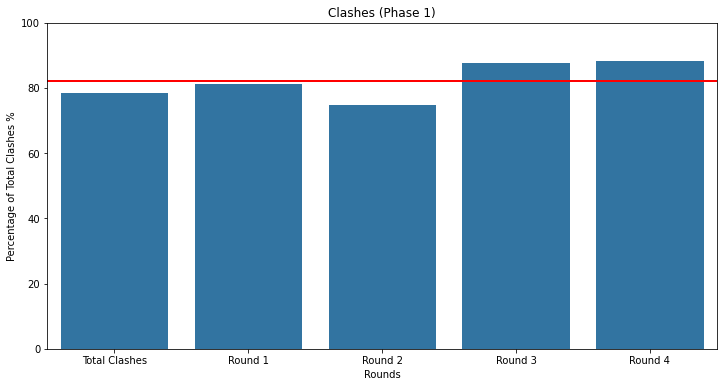

In [31]:
## AR Walls Clashes as % of the total

plt.figure(figsize = [12, 6])
y= ar_wall_mean*100
x=['Total Clashes', 'Round 1', 'Round 2', 'Round 3', 'Round 4']
s= sb.barplot(x=x, y=y, color = sb.color_palette()[0])

plt.ylim(0,100)
plt.xlabel('Rounds');
plt.ylabel('Percentage of Total Clashes %');
plt.title('Clashes (Phase 1)');
# Plotting vertical line showing the mean
plt.axhline(y.mean(), color='r', lw=2);

### Insights
1- Most of the clashes are divided between AR and STR disciplines.

2- AR Walls issues represent (75% - 88%) of total clashes.

3- Most of the AR wall clashes occur due to mistaken wall height.

4- These clashes cause no problems at the construction stage, but they have a great impact on the BOQ

5- The suggested solution to this issue is to use a Dynamo script that can correct wrong wall heights

6- Approximately nothing has changed between Round 3 & Round 4, So we are going to start 
"Phase 2” with new XML files.

